In [57]:
from datetime import datetime
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import pymc as pm
import arviz as az
import yfinance as yf

np.random.seed(101)
az.style.use('arviz-darkgrid')

In [32]:
riskfree_rate

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-11-15 00:00:00-06:00,3.816,3.844,3.760,3.799,0,0.0,0.0
2022-11-16 00:00:00-06:00,3.768,3.797,3.692,3.692,0,0.0,0.0
2022-11-17 00:00:00-06:00,3.762,3.803,3.743,3.775,0,0.0,0.0
2022-11-18 00:00:00-06:00,3.805,3.827,3.762,3.818,0,0.0,0.0
2022-11-21 00:00:00-06:00,3.814,3.836,3.762,3.825,0,0.0,0.0
2022-11-22 00:00:00-06:00,3.803,3.817,3.749,3.758,0,0.0,0.0
2022-11-23 00:00:00-06:00,3.776,3.797,3.695,3.706,0,0.0,0.0
2022-11-25 00:00:00-06:00,3.726,3.756,3.681,3.691,0,0.0,0.0
2022-11-28 00:00:00-06:00,3.683,3.718,3.668,3.703,0,0.0,0.0


In [30]:
market

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2022-11-15 00:00:00-05:00,383.848931,384.958905,377.476165,381.303650,93194500,0.000,0.0,0.0
2022-11-16 00:00:00-05:00,379.667401,380.624273,377.763237,378.394775,68508500,0.000,0.0,0.0
2022-11-17 00:00:00-05:00,373.619996,377.916369,373.313820,377.236969,74496300,0.000,0.0,0.0
2022-11-18 00:00:00-05:00,380.585979,380.652967,376.088702,378.949738,92922500,0.000,0.0,0.0
2022-11-21 00:00:00-05:00,377.619730,378.748831,375.725114,377.571869,51243200,0.000,0.0,0.0
2022-11-22 00:00:00-05:00,379.523934,382.815574,378.107754,382.652893,60429000,0.000,0.0,0.0
2022-11-23 00:00:00-05:00,382.317994,385.552224,382.088354,385.064240,68261600,0.000,0.0,0.0
2022-11-25 00:00:00-05:00,384.499622,385.533060,384.222150,384.978058,30545400,0.000,0.0,0.0
2022-11-28 00:00:00-05:00,381.877805,383.523625,378.069446,378.834961,67881600,0.000,0.0,0.0


In [33]:
start = datetime(2022, 11, 15)
end = datetime(2022, 12, 31)
market = yf.Ticker('SPY').history(start=start, end=end)
stock = yf.Ticker('AAPL').history(start=start, end=end)
riskfree_rate = yf.Ticker('^TNX').history(start=start, end=end)  # 10 year US treasury note


daily_returns = pd.DataFrame(
    index=stock.index,
    data={
        'market': (market['Close'].pct_change(1) * 100).values,
        'stock': (stock['Close'].pct_change(1) * 100).values,
        'riskfree': ((1 + riskfree_rate['Close']) ** (1/360) - 1).values
    }
)

# market.index.difference(riskfree_rate.index)
daily_returns = daily_returns.ffill()
daily_returns = daily_returns.dropna()
daily_returns.isnull().sum()
daily_returns.head()

,market,stock,riskfree
Date,,,
2022-11-16 00:00:00-05:00,-0.762876,-0.833121,0.004303
2022-11-17 00:00:00-05:00,-0.305978,1.297139,0.004352
2022-11-18 00:00:00-05:00,0.454030,0.378175,0.004377
2022-11-21 00:00:00-05:00,-0.363602,-2.168008,0.004381
2022-11-22 00:00:00-05:00,1.345710,1.466122,0.004342


Text(0.5, 0, 'Excess returns of S&P 500')

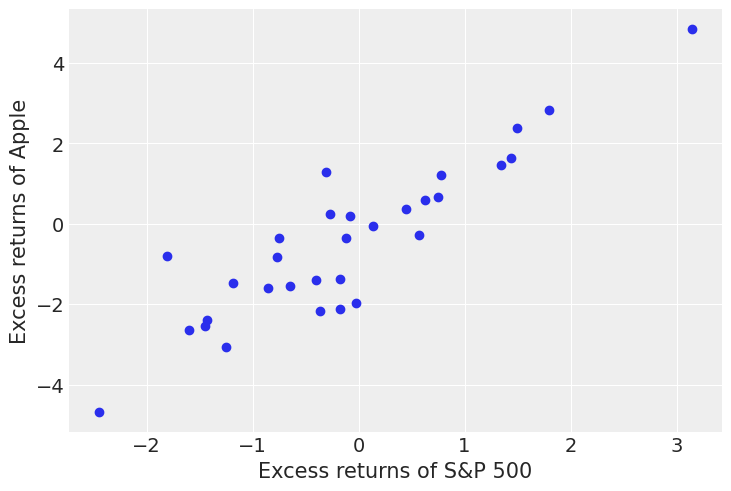

In [34]:
y = daily_returns['stock'] - daily_returns['riskfree']
x = daily_returns['market'] - daily_returns['riskfree']

plt.scatter(x, y)
plt.ylabel('Excess returns of Apple')
plt.xlabel('Excess returns of S&P 500')

Text(0.5, 0, 'Excess returns of Apple')

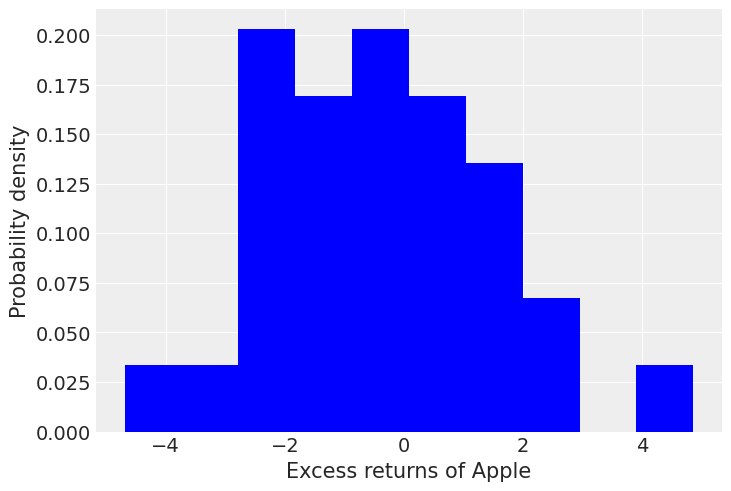

In [35]:
plt.hist(y, density=True, color='blue')
plt.ylabel('Probability density')
plt.xlabel('Excess returns of Apple')

In [36]:
daily_returns.describe()

,market,stock,riskfree
count,31.000000,31.000000,31.000000
mean,-0.110989,-0.444418,0.004282
std,1.192475,1.967498,0.000083
min,-2.446161,-4.685426,0.004129
25%,-0.805426,-1.775167,0.004200
50%,-0.171770,-0.343479,0.004299
75%,0.602690,0.635440,0.004340
max,3.150075,4.859386,0.004417


In [37]:
test_size = 10

x_train = x[:-test_size]
y_train = y[:-test_size]

x_test = x[-test_size:]
y_test = y[-test_size:]

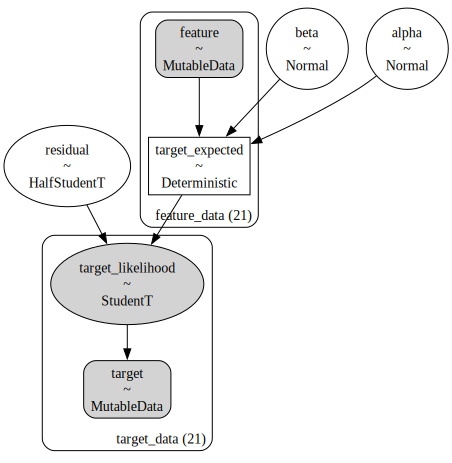

In [41]:
model = pm.Model()

# The with statement creates a context manager for the model object.
# All variables and constants inside the with-block are part of the model.
with model:
    # Define the prior probability distributions of the model's parameters. 
    # Use prior domain knowledge.

    # Assume that alpha is normally distributed. The values of mu and 
    # sigma are based on previous data analysis and trial and error.
    alpha = pm.Normal('alpha', mu=0.02, sigma=0.10)

    # Assume that beta is normally distributed. The values of mu and 
    # sigma are based on previous data analysis and trial and error.
    beta = pm.Normal('beta', mu=1.2, sigma=0.15)

    # Assume residuals are Half Student's t-distribution with nu=6. 
    # Value of nu=6 is based on research studies and trial and error.
    residual = pm.HalfStudentT('residual', sigma=0.20, nu=6)

    # Mutatable data containers are used so that we can swap out 
    # training data for test data later.
    feature = pm.MutableData('feature', x_train, dims='feature_data')
    target = pm.MutableData('target', y_train, dims='target_data')

    # Expected daily excess returns of Apple are approximately 
    # linearly related to daily excess returns of S&P 500.
    # The function specifies the linear model and the expected return. 
    # It creates a deterministic variable in the trace object.
    target_expected = pm.Deterministic(
        'target_expected', 
        alpha + beta * feature, 
        dims='feature_data'
    )

    # Assign the training data sample to the likelihood function.
    # Daily excess stock price returns are assumed to be T-distributed, nu=6.
    target_likelihood = pm.StudentT(
        'target_likelihood', 
        mu=target_expected, 
        sigma=residual, 
        nu=6, 
        observed=target, 
        dims='target_data'
    )

# Use the graphviz method to visualize the probabilistic model's data, 
# parameters, distributions and dependencies
pm.model_to_graphviz(model)

In [51]:
# Sample from the prior distributions and the likelihood function 
# to generate prior predictive distribution of the model.
# Take 1000 draws from the prior predictive distribution 
# to simulate (1000*21) target values based on our prior assumptions.
idata = pm.sample_prior_predictive(
    samples=1000, 
    model=model, 
    return_inferencedata=True, 
    random_seed=101
)

# PyMC/Arviz returns an xarray - a labeled, multidimensional array 
# containing inference data samples structured into groups. Note the 
# dimensions of the prior predictive group to see how we got (1*1000*21) 
# simulated target data of the prior predictive distribution.
idata

Sampling: [alpha, beta, residual, target_likelihood]


Inference data with groups:
	> prior
	> prior_predictive
	> observed_data
	> constant_data

array([[<Axes: title={'center': 'alpha'}>,
        <Axes: title={'center': 'alpha'}>],
       [<Axes: title={'center': 'beta'}>,
        <Axes: title={'center': 'beta'}>],
       [<Axes: title={'center': 'residual'}>,
        <Axes: title={'center': 'residual'}>]], dtype=object)

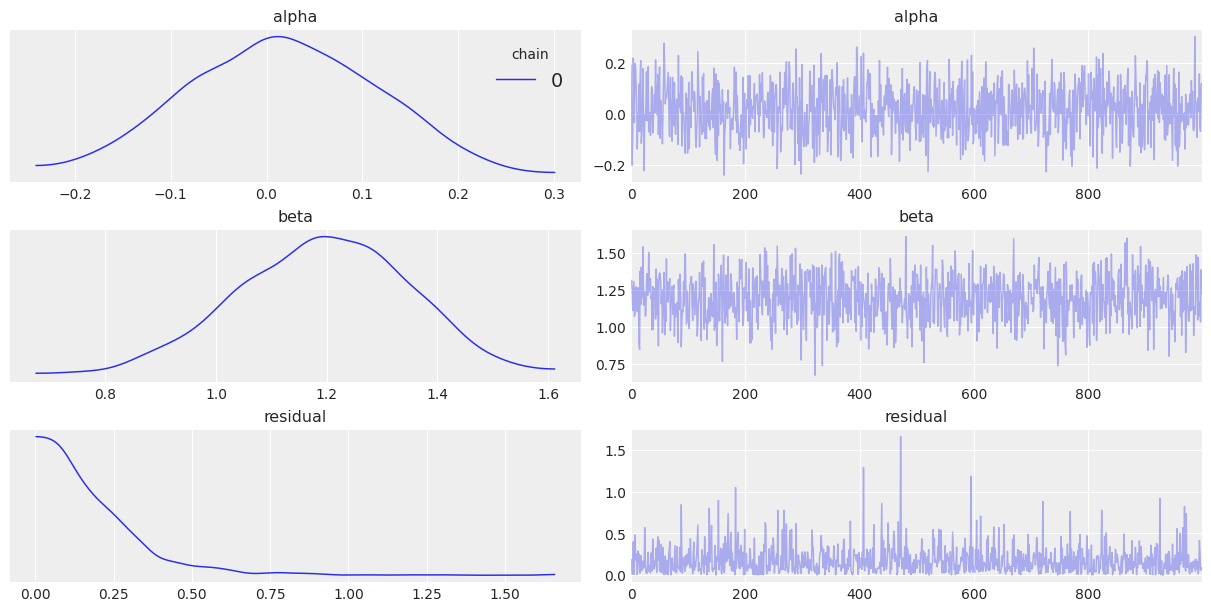

In [52]:
# Subplots on the left show the kernel density estimates (KDE) of 
# the marginal prior probability distributions of model parameters 
# from the 1000 samples drawn. Subplots on the right show the parameter 
# values from a single Markov chain that were sampled sequentially 
# by the NUTS sampler, the default regression sampler.
az.plot_trace(
    idata.prior, 
    kind='trace', 
    var_names=['alpha', 'beta', 'residual'], 
    legend=True
)

array([<Axes: title={'center': 'alpha'}>,
       <Axes: title={'center': 'beta'}>,
       <Axes: title={'center': 'residual'}>], dtype=object)

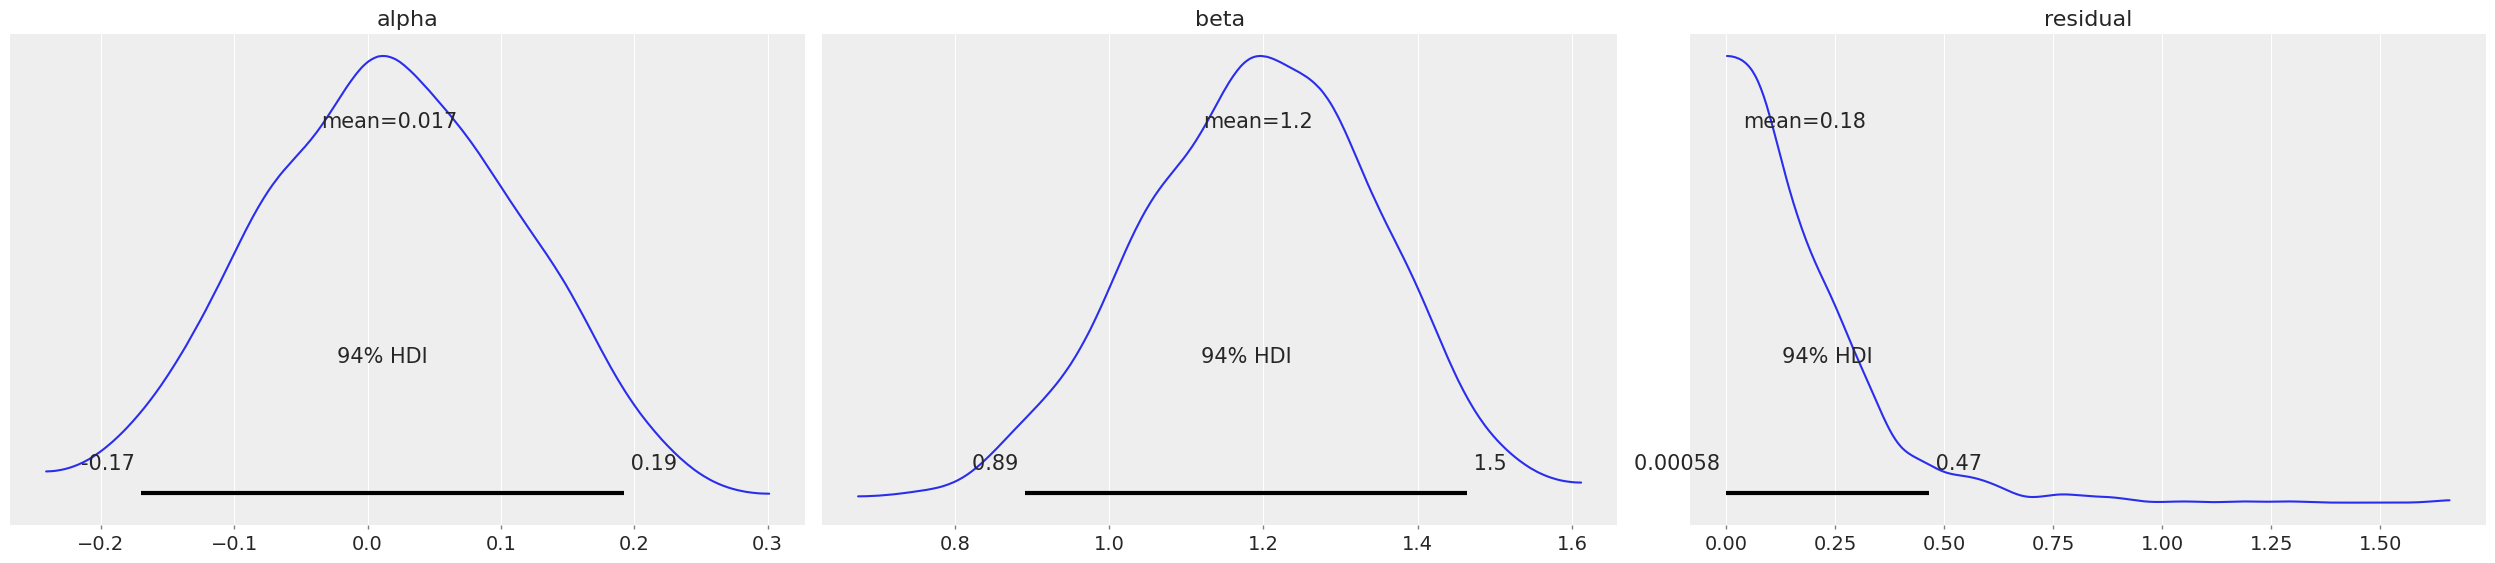

In [53]:
# Plot the marginal prior distributions of each parameter with 94% 
# highest density intervals (HDI).
# Note the residual subplot shows the majority of probability density function
# within 3 percentage points and the rest extending out into a long tail.
# In Arviz, there is no method to plot the prior marginal distributions but we 
# can hack the plot posterior method and use the prior group instead.
az.plot_posterior(
    idata.prior, 
    var_names=['alpha', 'beta', 'residual'], 
    round_to=2
)

array([[<Axes: >, None],
       [<Axes: xlabel='alpha', ylabel='beta'>, <Axes: >]], dtype=object)

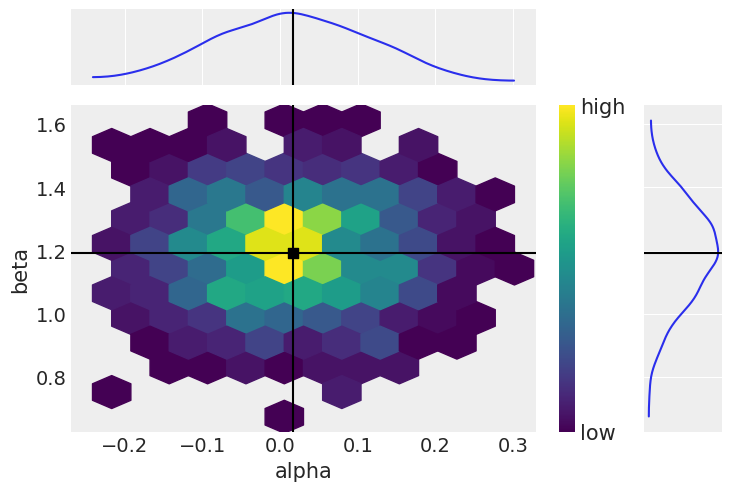

In [54]:
# Plot the joint prior probability distribution of alpha and beta with their 
# respective means and marginal distributions on the side.
# Hexabin plot below shows little or no linear correlation with the high 
# concentration areas in the heat map forming a cloud.
az.plot_pair(
    idata.prior, 
    var_names=['alpha', 'beta'], 
    kind='hexbin', 
    marginals=True, 
    point_estimate='mean', 
    colorbar=True
)

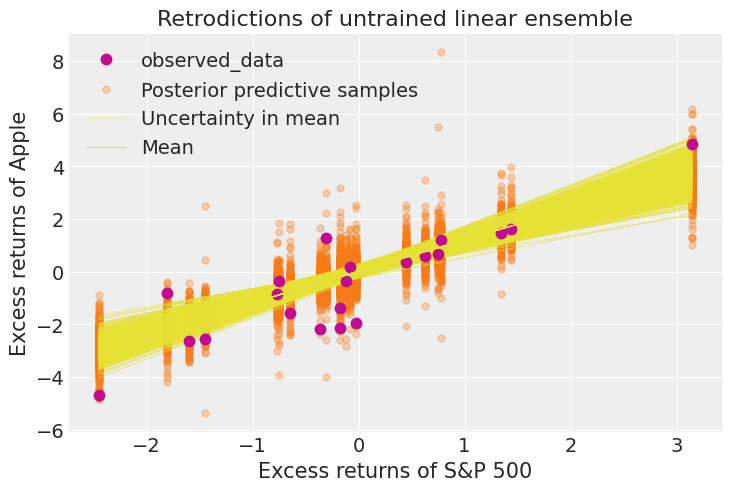

In [58]:
# Plot the retrodictions of prior predictive ensemble.

# Retrieve feature and target training data from the constant_data group.
# Feature is now an Xarray instead of a panda's series, 
# a requirement for ArviZ data analysis.
feature_train = idata.constant_data['feature']
target_train = idata.constant_data['target']

# Generate 1000 linear regression lines based on 1000 draws from one  
# Markov chain of the prior distributions of alpha and beta.
# Prior target values are in 1000 arrays with each array having 21 samples,
# the same number of samples as our training data set.
prior_target = idata.prior["alpha"] + idata.prior["beta"] * feature_train

# Prior_predictive is the data generating distribution of the untrained ensemble.
prior_predictive = idata.prior_predictive['target_likelihood']

# Create figure of subplots
fig, ax = plt.subplots()
# Plot epistemic and aleatory uncertainties of untrained 
# ensemble's retrodictions.
az.plot_lm(
    idata=idata, x=feature_train, y=target_train, 
    num_samples=1000, y_model = prior_target, 
    y_hat = prior_predictive, axes=ax
)

#Label the figure.
ax.set_xlabel("Excess returns of S&P 500")
ax.set_ylabel("Excess returns of Apple")
ax.set_title("Retrodictions of untrained linear ensemble")
ax.legend(loc='upper left')

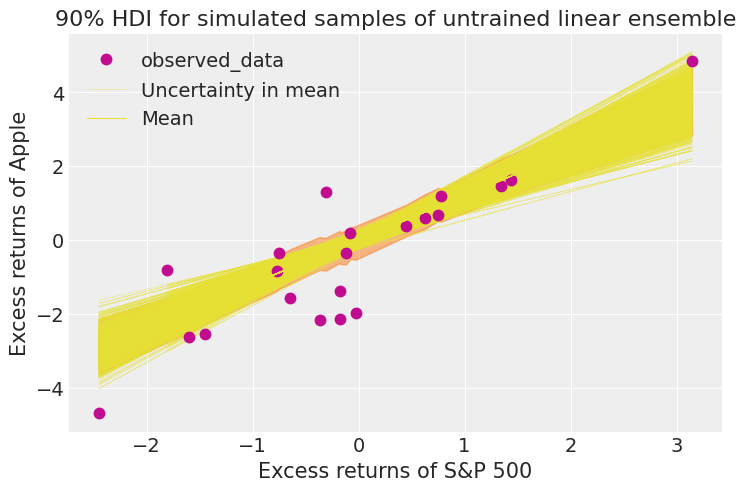

In [56]:
# Plot 90% HDI of untrained ensemble.
# This will show the aleatory (data related) and epistemic 
# (parameter related) uncertainty of model output before it is trained.

# Create figure of subplots.
fig, ax = plt.subplots()

# Plot the ensemble of 1000 regression lines to show the 
# epistemic uncertainty around the mean regression line.
az.plot_lm(
    idata=idata, x=feature_train, y=target_train, 
    num_samples=1000, y_model = prior_target, axes=ax
)

# Plot the prior predictive data within the 90% HDI band to 
# show both epistemic and aleatory uncertainties.
az.plot_hdi(feature_train, prior_predictive, hdi_prob=0.90, smooth=False)

# Label figure.
ax.set_xlabel("Excess returns of S&P 500")
ax.set_ylabel("Excess returns of Apple")
ax.set_title("90% HDI for simulated samples of untrained linear ensemble")
ax.legend()

Text(0.5, 1.0, 'Prior predictive check of untrained linear ensemble')

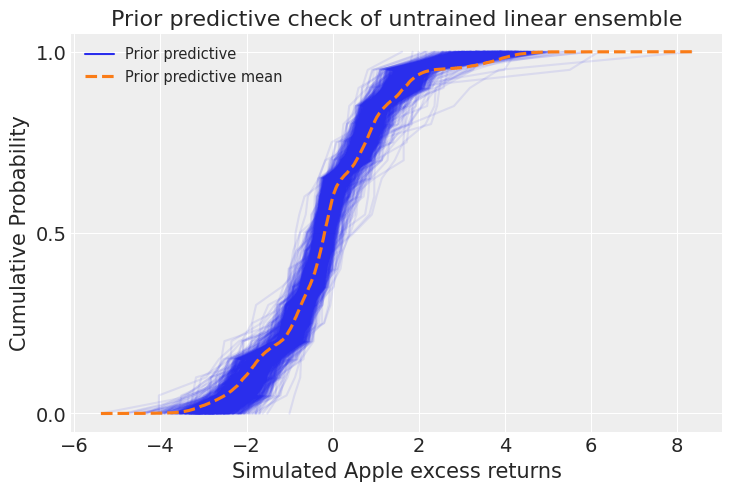

In [59]:
# Conduct a prior predictive check of the untrained linear ensemble.
# Create figure of subplots.
fig, ax = plt.subplots()
# Plot the prior predictive check
az.plot_ppc(
    idata, group='prior', kind='cumulative', 
    num_pp_samples=1000, alpha=0.1, ax=ax
)

# Label the figure.
ax.set_xlabel("Simulated Apple excess returns")
ax.set_ylabel("Cumulative Probability")
ax.set_title("Prior predictive check of untrained linear ensemble")

In [60]:
# Evaluate untrained ensemble's retrodictions by comparing simulated 
# data with training data.

# Extract target values of our training data.
target_actual = target_train.values

# Sample the prior predictive distribution to simulate 
# expected target training values.
target_predicted = idata.prior_predictive.stack(sample=("chain", "draw"))['target_likelihood'].values.T

# Use the probabilistic R-squared metric.
prior_score = az.r2_score(target_actual, target_predicted)
prior_score.round(2)

r2        0.65
r2_std    0.09
dtype: float64